In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/stroke.csv")

df = df.rename(columns={"id":"ID","gender":"GENDER", "age" : "AGE", "hypertension" : "HYPERTENSION", "heart_disease":"HEART_D", "ever_married":"MARRIED", "work_type":"WORK"
                        ,"Residence_type":"RESIDENCE", "avg_glucose_level":"GLUCOSE_LV","bmi" : "BMI", "smoking_status":"SMOKING", "stroke":"STROKE"})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5110 non-null   int64  
 1   GENDER        5110 non-null   object 
 2   AGE           5110 non-null   float64
 3   HYPERTENSION  5110 non-null   int64  
 4   HEART_D       5110 non-null   int64  
 5   MARRIED       5110 non-null   object 
 6   WORK          5110 non-null   object 
 7   RESIDENCE     5110 non-null   object 
 8   GLUCOSE_LV    5110 non-null   float64
 9   BMI           4909 non-null   float64
 10  SMOKING       5110 non-null   object 
 11  STROKE        5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [19]:
df_fill=df.fillna(0) #Fill NaN values on BMI
df_fill.info()

df_fill.loc[df_fill['GENDER'] == 'Other']
df_fill.loc[df_fill["GENDER"] == "Other", "GENDER"] = "Male" # Replace value Other to Male on Column Gender
print("")
print("Cek Value Other")
df_fill.loc[df_fill['GENDER'] == 'Other']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5110 non-null   int64  
 1   GENDER        5110 non-null   object 
 2   AGE           5110 non-null   float64
 3   HYPERTENSION  5110 non-null   int64  
 4   HEART_D       5110 non-null   int64  
 5   MARRIED       5110 non-null   object 
 6   WORK          5110 non-null   object 
 7   RESIDENCE     5110 non-null   object 
 8   GLUCOSE_LV    5110 non-null   float64
 9   BMI           5110 non-null   float64
 10  SMOKING       5110 non-null   object 
 11  STROKE        5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Cek Value Other


,ID,GENDER,AGE,HYPERTENSION,HEART_D,MARRIED,WORK,RESIDENCE,GLUCOSE_LV,BMI,SMOKING,STROKE


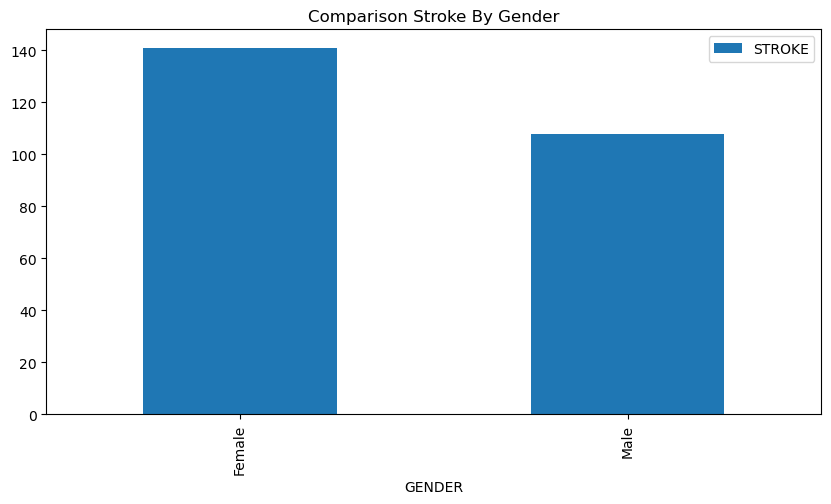

In [20]:
df_gender = df_fill[["GENDER", "STROKE"]]
df_gender_index = df_gender.set_index("GENDER")

df_gender_index.groupby("GENDER").sum("STROKE").plot(kind="bar", figsize=(10,5))

plt.title ("Comparison Stroke By Gender")
plt.show()
# Kasus Penderita Stroke dengan jenis kelamin perempuan lebih banyak dibandingkan dengan jenis kelamin laki - laki


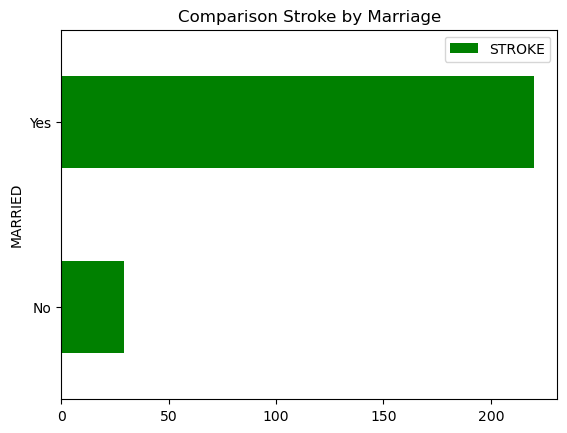

In [13]:
df_married_index = df_fill[['MARRIED','STROKE']]
df_married_index.groupby('MARRIED').sum().plot(kind='barh', color='green')
plt.title("Comparison Stroke by Marriage")
plt.show()
# Kasus penyakit stroke didominasi oleh pasien yang telah menikah

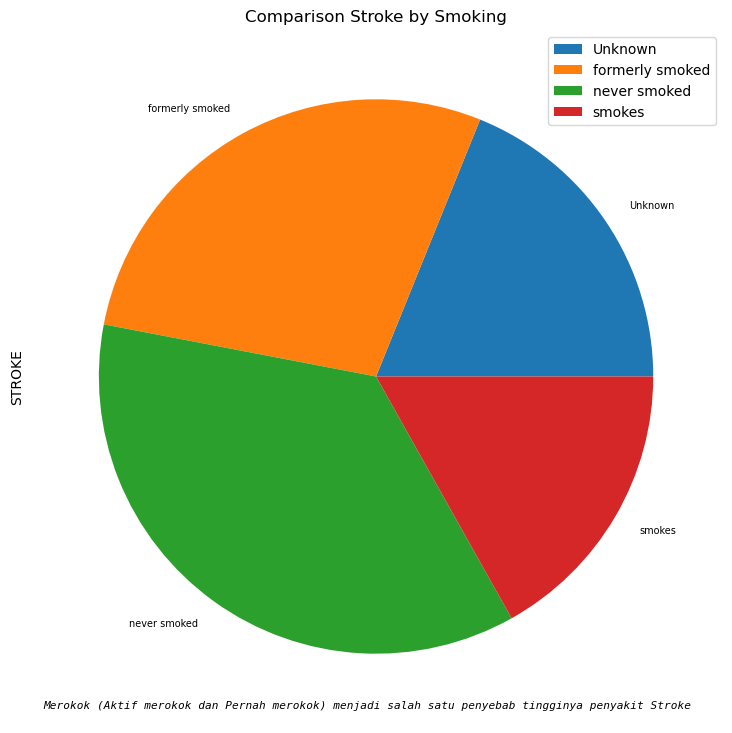

In [14]:
df_pie = df_fill
df_pie.drop('ID', axis = 1)

df_pie = df_pie[['SMOKING','STROKE']].groupby('SMOKING').sum('STROKE')
df_pie.plot.pie(y='STROKE', figsize = (9,9), fontsize= 7)
plt.title("Comparison Stroke by Smoking")
teks = ('Merokok (Aktif merokok dan Pernah merokok) menjadi salah satu penyebab tingginya penyakit Stroke')
plt.text(-1.2, -1.2, teks, fontsize = 8, family = 'monospace', style = 'italic', ha='left', rotation=0, wrap=True)

plt.show()